In [145]:
# Data
import pandas as pd
import numpy as np

BC_data = pd.read_csv('project2.data')

In [146]:
BC_data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [147]:
# change class values to 0 or 1
BC_data.loc[BC_data.get("class") == "no-recurrence-events", "class"] = 0
BC_data.loc[BC_data.get("class") == "recurrence-events", "class"] = 1
BC_data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [148]:
# change the datatype
BC_data['class'] = BC_data['class'].astype(int)

In [149]:
# size of the data
BC_data.size

2860

In [150]:
# shape of the data
BC_data.shape

(286, 10)

In [151]:
# datatypes
BC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    int64 
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(2), object(8)
memory usage: 22.5+ KB


In [152]:
BC_data['node-caps'].unique()

array(['no', 'yes', '?'], dtype=object)

In [153]:
BC_data['breast-quad'].unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'],
      dtype=object)

In [154]:
BC_data[BC_data["node-caps"] == "?"]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
145,0,40-49,premeno,25-29,0-2,?,2,left,right_low,yes
163,0,60-69,ge40,25-29,3-5,?,1,right,left_up,yes
164,0,60-69,ge40,25-29,3-5,?,1,right,left_low,yes
183,0,50-59,ge40,30-34,9-11,?,3,left,left_up,yes
184,0,50-59,ge40,30-34,9-11,?,3,left,left_low,yes
233,1,70-79,ge40,15-19,9-11,?,1,left,left_low,yes
263,1,50-59,lt40,20-24,0-2,?,1,left,left_up,no
264,1,50-59,lt40,20-24,0-2,?,1,left,left_low,no


In [155]:
BC_data[BC_data["breast-quad"] == "?"]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
206,1,50-59,ge40,30-34,0-2,no,3,left,?,no


In [156]:
# find the mode for node-caps
BC_data.get('node-caps').mode()

0    no
Name: node-caps, dtype: object

In [157]:
# find the mode for brest-quad
BC_data.get('breast-quad').mode()

0    left_low
Name: breast-quad, dtype: object

In [158]:
BC_data.loc[BC_data.get("breast-quad") == "?", "breast-quad"] = "left_low"

In [159]:
BC_data.loc[BC_data.get("node-caps") == "?", "node-caps"] = "no"

<Axes: xlabel='age', ylabel='Count'>

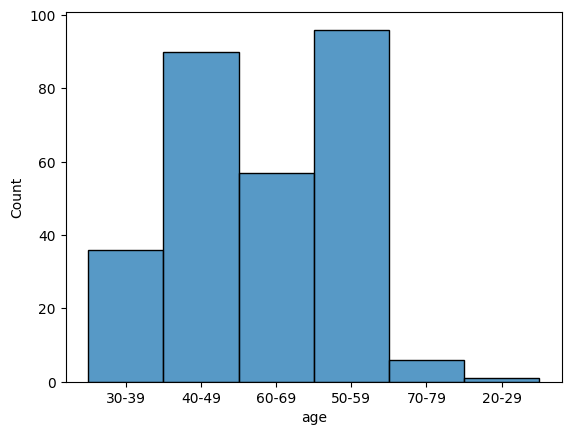

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=BC_data["age"])

<Axes: xlabel='menopause', ylabel='Count'>

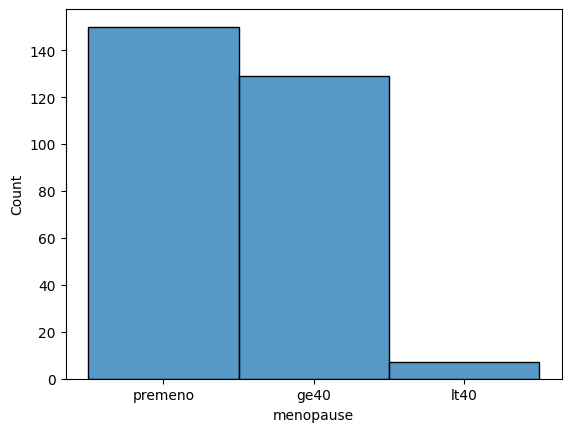

In [161]:
sns.histplot(data=BC_data["menopause"])

<Axes: xlabel='class', ylabel='Count'>

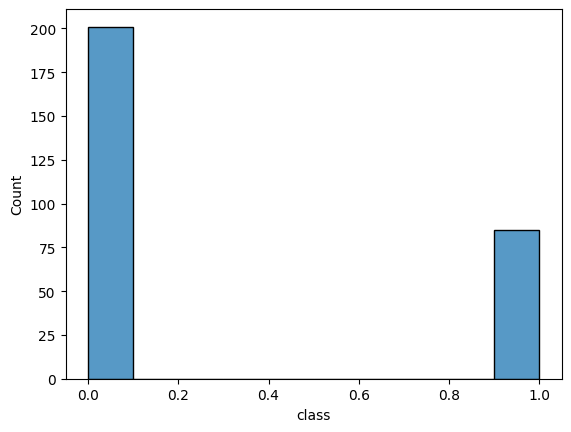

In [184]:
sns.histplot(data=BC_data["class"])

<Axes: xlabel='irradiat', ylabel='Count'>

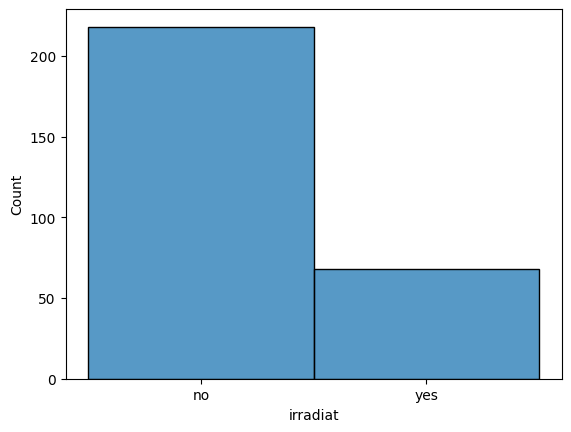

In [163]:
sns.histplot(data=BC_data["irradiat"])

In [164]:
BC_data['irradiat'] = BC_data['irradiat'].astype("category")
BC_data['menopause'] = BC_data['menopause'].astype("category")
BC_data['breast'] = BC_data['breast'].astype("category")
BC_data['breast-quad'] = BC_data['breast-quad'].astype("category")
BC_data['node-caps'] = BC_data['node-caps'].astype("category")
BC_data['tumor-size'] = BC_data['tumor-size'].astype("category")
BC_data['inv-nodes'] = BC_data['inv-nodes'].astype("category")
BC_data['age'] = BC_data['age'].astype("category")

In [165]:
BC_data = pd.get_dummies(BC_data, columns=['irradiat','menopause','breast','breast-quad','node-caps','tumor-size','inv-nodes','age'], drop_first=True)
BC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   class                  286 non-null    int64
 1   deg-malig              286 non-null    int64
 2   irradiat_yes           286 non-null    bool 
 3   menopause_lt40         286 non-null    bool 
 4   menopause_premeno      286 non-null    bool 
 5   breast_right           286 non-null    bool 
 6   breast-quad_left_low   286 non-null    bool 
 7   breast-quad_left_up    286 non-null    bool 
 8   breast-quad_right_low  286 non-null    bool 
 9   breast-quad_right_up   286 non-null    bool 
 10  node-caps_yes          286 non-null    bool 
 11  tumor-size_10-14       286 non-null    bool 
 12  tumor-size_15-19       286 non-null    bool 
 13  tumor-size_20-24       286 non-null    bool 
 14  tumor-size_25-29       286 non-null    bool 
 15  tumor-size_30-34       286 non-null    b

In [166]:
BC_data.head()

,class,deg-malig,irradiat_yes,menopause_lt40,menopause_premeno,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,...,inv-nodes_15-17,inv-nodes_24-26,inv-nodes_3-5,inv-nodes_6-8,inv-nodes_9-11,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79
0,0,3,False,False,True,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0,2,False,False,True,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,0,2,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0,2,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,2,False,False,True,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [167]:
# split data into training and test datasets
from sklearn.model_selection import train_test_split
X = BC_data.drop('class',axis=1)
y = BC_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

Decision Tree

In [168]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

In [185]:
# Accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test, model.predict(X_test))
print('Accuracy of Decision Tree Model on test data is : {:.2}'.format(accuracy_test))

accuracy_train=accuracy_score(y_train, model.predict(X_train))
print('Accuracy of Decision Tree Model on train data is : {:.2}'.format(accuracy_train))

Accuracy of Decision Tree Model on test data is : 0.63
Accuracy of Decision Tree Model on train data is : 0.97


In [186]:
# recall, precision, f1
from sklearn.metrics import classification_report
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.72      0.77      0.74        60
           1       0.36      0.31      0.33        26

    accuracy                           0.63        86
   macro avg       0.54      0.54      0.54        86
weighted avg       0.61      0.63      0.62        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       141
           1       1.00      0.90      0.95        59

    accuracy                           0.97       200
   macro avg       0.98      0.95      0.96       200
weighted avg       0.97      0.97      0.97       200



K-Nearest Neighbors 

In [171]:
from sklearn.neighbors import KNeighborsClassifier
knn_search_accuracy = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 100)}
from sklearn.model_selection import GridSearchCV
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5)

In [172]:
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [173]:
knn_gscv.best_params_

{'n_neighbors': 14}

In [174]:
best_knn = knn_gscv.best_estimator_

In [175]:
# recall, f1, precision
from sklearn.metrics import classification_report
print(f"Performance on TEST\n*******************\n{classification_report(y_test, best_knn.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, best_knn.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.70      0.98      0.82        60
           1       0.50      0.04      0.07        26

    accuracy                           0.70        86
   macro avg       0.60      0.51      0.45        86
weighted avg       0.64      0.70      0.59        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       141
           1       0.90      0.15      0.26        59

    accuracy                           0.74       200
   macro avg       0.82      0.57      0.55       200
weighted avg       0.78      0.74      0.67       200



In [176]:
# accuracy
accuracy_test=accuracy_score(y_test, best_knn.predict(X_test))
print('Accuracy of best knn on test data is : {:.2}'.format(accuracy_test))

accuracy_train=accuracy_score(y_train, best_knn.predict(X_train))
print('Accuracy of best knn on train data is : {:.2}'.format(accuracy_train))

Accuracy of best knn on test data is : 0.7
Accuracy of best knn on train data is : 0.74


K-Nearest Neighbor with Better Recall

In [177]:
knn_search_recall = KNeighborsClassifier()

knn_gscv2 = GridSearchCV(knn_search_recall, param_grid, cv=5, scoring="recall") #default is accuracy
knn_gscv2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='recall')

In [187]:
best_recall = knn_gscv2.best_estimator_

accuracy_test=accuracy_score(y_test, best_recall.predict(X_test))
print('Accuracy of best recall knn on test data is : {:.2}'.format(accuracy_test))

# Check accuracy on the training data
accuracy_train=accuracy_score(y_train, best_recall.predict(X_train))
print('Accuracy of best recall knn on train data is : {:.2}'.format(accuracy_train))

Accuracy of best recall knn on test data is : 0.58
Accuracy of best recall knn on train data is : 0.97


In [183]:
# precision, recall, f1
print(f"Performance on TEST\n*******************\n{classification_report(y_test, best_recall.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, best_recall.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        60
           1       0.27      0.23      0.25        26

    accuracy                           0.58        86
   macro avg       0.48      0.48      0.48        86
weighted avg       0.56      0.58      0.57        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       141
           1       0.98      0.92      0.95        59

    accuracy                           0.97       200
   macro avg       0.97      0.95      0.96       200
weighted avg       0.97      0.97      0.97       200



Logistic Regression

In [178]:
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression(random_state=1, max_iter=1000).fit(X_train, y_train)
# print the report
print(f"Performance on TEST\n*******************\n{classification_report(y_test, LRmodel.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, LRmodel.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        60
           1       0.57      0.31      0.40        26

    accuracy                           0.72        86
   macro avg       0.66      0.60      0.61        86
weighted avg       0.70      0.72      0.69        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       141
           1       0.67      0.37      0.48        59

    accuracy                           0.76       200
   macro avg       0.72      0.65      0.66       200
weighted avg       0.75      0.76      0.74       200



In [179]:
# accuracy
accuracy_test=accuracy_score(y_test, LRmodel.predict(X_test))
print('Accuracy of Logistic Regression Model on test data is : {:.2}'.format(accuracy_test))

accuracy_train=accuracy_score(y_train, LRmodel.predict(X_train))
print('Accuracy of Logistic Regression Model on train data is : {:.2}'.format(accuracy_train))

Accuracy of Logistic Regression Model on test data is : 0.72
Accuracy of Logistic Regression Model on train data is : 0.76
